# Métodos não-paramétricos

A distribuição amostral de uma estatística é a distribuição dessa estatística, considerada como uma variável aleatória, quando derivada de uma amostra aleatória de tamanho $n$. Pode ser considerada como a distribuição da estatística para todas as amostras possíveis da mesma população para um determinado tamanho de amostra.

O desvio padrão da distribuição amostral de uma estatística é conhecido como o **erro padrão** (*standard error*) dessa quantidade. Para o caso em que a estatística é a média da amostra (denotada por $\bar{x}$), o erro padrão é computado por meio da aplicação do TLC:

$$
\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}
$$

Por exemplo, todos os procedimentos para estimar parâmetros e para testar hipóteses que estudamos até aqui possuem certas pressuposições sobre a população.
- “a variância da população é conhecida”
- “a população é aproximadamente normal”
- “as variâncias das amostras são aproximadamente iguais”

Métodos estatísticos que presumem algo acerca da distribuição da população em estudo são denominados *paramétricos* (e.g., testes t, z, F, $\chi^2$).

Mas, e se tivermos apenas a amostra e não sabemos nada sobre a população? Ou se não podemos atender às condições de aplicabilidades dos testes paramétricos?
Nesses casos, uma alternativa é usar *métodos não paramétricos*. Alguns desses métodos é o denominado Boostrapping.

> Métodos **não-paramétricos** são técnicas estatísticas que **não assumem uma forma específica para a distribuição da população** da qual os dados foram coletados. Em outras palavras, **não exigem que os dados sigam uma distribuição pré-definida**, como a normal.

Esses métodos são úteis quando:

* a amostra é pequena;
* os dados não atendem aos pressupostos dos métodos paramétricos (como normalidade ou homocedasticidade);
* se deseja realizar inferência com o mínimo de suposições sobre a população.

Exemplos comuns:

* **Teste de Mann–Whitney** (alternativa ao teste t para duas amostras independentes);
* **Teste de Wilcoxon** (alternativa ao teste t pareado);
* **Teste de Kruskal–Wallis** (alternativa à ANOVA);
* **Estimadores de densidade por kernel** (para estimar distribuições de probabilidade);
* **Método de Kaplan–Meier** (para análise de sobrevivência).

Esses métodos são, em geral, **mais robustos**, mas podem ter **menor poder estatístico** se os pressupostos paramétricos forem de fato válidos.


# Bootstrapping: visão geral

Em Estatística, *Bootstrapping* é o nome dado a uma técnica não-paramétrica que usa amostragem aleatória com substituição para simular o processo de amostragem a partir de uma população. Esta técnica permite estimar a distribuição amostral de quase todas as estatísticas usando métodos de amostragem aleatória.

O *bootstrapping* pode ser usado para
1. produzir intervalos de confiança para algum parâmetro populacional. 
2. realizar testes de hipóteses. 

Esse método é frequentemente usado como uma alternativa às técnicas de inferência estatística que se baseiam na suposição de um modelo paramétrico ($t$-teste, $z$-teste, etc) quando as condições de aplicabilidade não podem ser satisfeitas ou quando a inferência paramétrica é impossível ou requer fórmulas complicadas para o cálculo de erros padrão.

As etapas de aplicação do *bootstrapping* para estimar a distribuição amostral de alguma estatística $T$ (e.g., proporção, média, mediana, etc) são ilustradas na figura a seguir ([fonte](https://online.stat.psu.edu/stat555)).

<center><img src="https://online.stat.psu.edu/stat555/sites/onlinecourses.science.psu.edu.stat555/files/cross_val/bootstrap_overview/index.png" style="width:420px; margin-bottom:32px; background-color:#082767"/></center>

Explicação do contéudo da figura:

1. A distribuição amostral verdadeira (*true sampling distribution*) é calculada tomando novas amostras da população, calculando $T$ e então acumulando todos os valores de $T$ na distribuição amostral.

2. No entanto, obter novas amostras a partir da população é um procedimento custoso na prática. Em vez disso, na técnica bootstrapping, usamos uma única amostra (*sample*) e a usamos **no lugar da população**. Essa única amostra é a população estimada.

3. Em seguida, selecionamos amostras "in silico" (i.e., com o uso do computador) da população estimada, e calculamos o valor de $T$ para cada uma.

4. Os valores calculados no passo anterior são então usados para produzir a estimativa da distribuição amostral (*bootstrap sampling distribution*).

---

> A partir da distribuição amostral estimada, podemos computar valores aproximados para algumas características da estatística. Por exemplo, se $T$ é uma variável quantitativa, podemos estar interessados ​​em características como sua média, variância, assimetria, etc. É também possível construir intervalos de confiança para a média de $T$.

> O método de Bootstrap se baseia em uma ideia central simples, mas poderosa: a amostra que temos contém informações sobre a população, e podemos aproveitar essa informação repetidamente ao gerar novas amostras simuladas.

> **Limitação a considerar**. O método é eficaz, mas sua qualidade depende da representatividade da amostra original. Se a amostra original for enviesada ou pequena demais, os resultados do Bootstrap também serão enviesados ou imprecisos.

## Remostragem com reposição (*sampling with replacement*)

A etapa (3) descrita acima envolve selecionar amostras com reposição a partir da amostra original. Essa etapa é realizada com o propósito de simular a produção de diversas amostras a partir da população. Essas amostras retiradas a partir da amostra original são denominadas *reamostras* (*resamples*). O termo "com reposição" significa que um elemento da amostra original pode ser selecionado **zero ou mais vezes** para fazer parte de uma reamostra.

A figura a seguir ([fonte](https://www.spss-tutorials.com)) ilustra o procedimento de amostragem com reposição.

<center><img src="https://www.spss-tutorials.com/img/simple-random-sampling-with-replacement.png" style="width:420px; margin-bottom:32px; background-color:#082767"/></center>

No Bootstraping, cada reamostra (também conhecida como *amostra boostrap*) deve ter a mesma quantidade de observações da amostra original. Veja a figura a seguir ([fonte](https://www.researchgate.net/profile/Paola-Galdi/publication/322179244)).

<center><img src="https://i.stack.imgur.com/5Nzqf.png" style="width:500px; margin-bottom:32px; background-color:#082767"/></center>

Para uma amostra original de tamanho $n$, o total de reamostras possíveis é dado pela seguinte expressão.
$$
\vert C_n \vert={{2n-1}\choose{n-1}}
$$

Um exemplo para $n = 5$:

$$
\vert C_n \vert={{9}\choose{4}} = \frac{9!}{4! \times 5!} = \frac{9 \times 8 \times 7 \times 6 \times 5!}{4! \times 5!} = \frac{9 \times 8 \times 7 \times 6}{4!} = 126
$$

Em geral, quanto maior a quantidade de reamostras usadas para produzir a aproximação da distribuição amostral da estimativa de interesse, maior a precisão das inferências que podem ser feitas por Bootstrap.


A figura abaixo ([fonte](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))) apresente esquematicamente o processo de uso da reamostragem com reposição para gerar a aproximação da distribuição amostral empírica para uma dada estatística de interesse.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Illustration_bootstrap.svg/1920px-Illustration_bootstrap.svg.png" style="width:820px; margin-bottom:32px; background-color:#FFFFFF"/></center>



# Aplicações do bootstrap

## Estimativa de viés

O **viés** de um estimador mede o quanto, em média, ele tende a superestimar ou subestimar o verdadeiro parâmetro.

$$
\text{Viés}(\hat{\theta}) = E[\hat{\theta}] - \theta
$$

Como o valor verdadeiro $\theta$ é desconhecido, o bootstrap o estima comparando a média das estatísticas obtidas nas reamostras com a estatística calculada na amostra original:

$$
\widehat{\text{Viés}}_{boot} = \bar{\theta}^* - \hat{\theta}
$$

Assim, se $\widehat{\text{Viés}}_{boot}$ for positivo, o estimador tende a superestimar o parâmetro; se for negativo, tende a subestimar.


Estimativa original: 6.400
Média das reamostras: 6.401
Viés estimado via bootstrap: 0.001


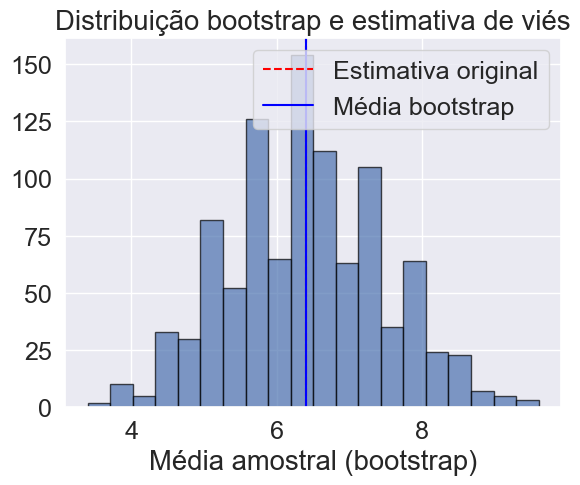

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Amostra original
x = np.array([3, 5, 6, 8, 10])
theta_hat = np.mean(x)

# Reamostragem bootstrap
B = 1000
n = len(x)
boot_means = np.array([
    np.mean(np.random.choice(x, size=n, replace=True))
    for _ in range(B)
])

# Estimativa de viés
bias_boot = np.mean(boot_means) - theta_hat

print(f"Estimativa original: {theta_hat:.3f}")
print(f"Média das reamostras: {np.mean(boot_means):.3f}")
print(f"Viés estimado via bootstrap: {bias_boot:.3f}")

# Visualização
plt.hist(boot_means, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(theta_hat, color='red', linestyle='--', label='Estimativa original')
plt.axvline(np.mean(boot_means), color='blue', label='Média bootstrap')
plt.title("Distribuição bootstrap e estimativa de viés")
plt.xlabel("Média amostral (bootstrap)")
plt.legend()
plt.show()

### Por que estimar o viés de um estimador?

Nem todo estimador é "centrado" no verdadeiro valor do parâmetro.
Mesmo que um estimador seja eficiente em amostras grandes, em amostras pequenas ele pode apresentar **viés** — isto é, tender sistematicamente a superestimar ou subestimar o parâmetro populacional.

O **bootstrap** permite quantificar esse viés **sem depender de fórmulas teóricas**, apenas reamostrando os dados observados.

Essa estimativa é especialmente útil em situações como:
- Estatísticas **não lineares** (e.g., medianas, razões, coeficientes de regressão);
- **Amostras pequenas**, onde a aproximação normal pode ser fraca;
- Modelos em que **não existe expressão analítica** para o viés do estimador.

Ao conhecer o viés, podemos inclusive **corrigir** a estimativa original:
$$
\hat{\theta}_{corrigido} = \hat{\theta} - \widehat{\text{Viés}}_{boot}
$$

## Estimativa do erro padrão

O **erro padrão** mede a variabilidade de um estimador em torno do seu valor esperado.

Em vez de utilizar fórmulas analíticas (que dependem da distribuição populacional), o bootstrap estima esse erro empiricamente a partir das reamostras:

$$
\widehat{SE}_{boot} = \sqrt{\frac{1}{B-1} \sum_{b=1}^{B} 
\left(\hat{\theta}^{*(b)} - \bar{\theta}^*\right)^2 }
$$

Quanto maior o número de reamostras $B$, mais estável será a estimativa do erro padrão.


In [31]:
# Estimativa do erro padrão via bootstrap
se_boot = np.sqrt(np.sum((boot_means - np.mean(boot_means))**2) / (B - 1))

print(f"Erro padrão estimado via bootstrap: {se_boot:.4f}")

# Comparação com o erro padrão teórico (para conferência)
se_teorico = np.std(x, ddof=1) / np.sqrt(n)
print(f"Erro padrão teórico (amostra normal): {se_teorico:.4f}")

Erro padrão estimado via bootstrap: 1.0775
Erro padrão teórico (amostra normal): 1.2083


O erro padrão estimado via bootstrap é geralmente próximo ao erro padrão teórico, 
mas não depende de nenhuma suposição sobre a distribuição dos dados.  

Isso é especialmente útil quando a estatística de interesse é complexa ou quando a distribuição populacional é desconhecida.

### Por que estimar o erro padrão via bootstrap?

O **erro padrão (EP)** quantifica a variabilidade de um estimador — ou seja, o quanto a estimativa mudaria se repetíssemos o experimento várias vezes.

Em muitos casos, o EP pode ser calculado por fórmulas teóricas simples.  
Por exemplo, para a **média amostral** $\bar{x}$, sob a suposição de amostragem independente e população com desvio padrão $\sigma$, temos:

$$
SE(\bar{x}) = \frac{\sigma}{\sqrt{n}}
$$

Como na prática $\sigma$ é desconhecido, substituímos por seu estimador amostral $s$:

$$
\widehat{SE}(\bar{x}) = \frac{s}{\sqrt{n}}
$$

Entretanto, há situações em que essas fórmulas:
- **não existem**,  
- **são difíceis de derivar**, ou  
- **dependem de suposições pouco realistas** (ex.: normalidade dos resíduos, homocedasticidade etc.).

O **bootstrap** oferece uma alternativa prática e generalista:
- Estima o erro padrão de qualquer estatística;
- Funciona mesmo em amostras pequenas ou distribuições assimétricas;
- Permite construir intervalos de confiança **sem precisar de distribuições teóricas**.

Assim, o bootstrap substitui deduções analíticas por **simulações empíricas** baseadas na própria amostra.


## Construção de intervalos de confiança

O **bootstrapping clássico para construção de intervalos de confiança** é uma das aplicações mais populares dessa técnica. Ele permite estimar a incerteza de uma estatística sem pressupor distribuições específicas.

---

### **Passos para Construir Intervalos de Confiança com Bootstrapping Clássico**

#### **1. Escolha a estatística de interesse**

Exemplos: média, mediana, desvio-padrão, diferença entre médias, coeficiente de regressão etc.
Denotaremos essa estatística como $\hat{\theta}$.

#### **2. Calcule a estatística na amostra original**

Esse valor será o seu estimador pontual $\hat{\theta}_{\text{obs}}$.

#### **3. Faça reamostragens com reposição**

* Gere $B$ reamostras (típico: 1.000 ou 10.000).
* Em cada reamostragem, calcule $\hat{\theta}^{*b}$, o valor da estatística para a amostra bootstrap.

#### **4. Obtenha a distribuição bootstrap da estatística**

Agora temos $B$ valores da estatística $\hat{\theta}^{*1}, \hat{\theta}^{*2}, \dots, \hat{\theta}^{*B}$, que representam a **distribuição empírica da estatística**.

#### **5. Construa o intervalo de confiança**

Existem algumas abordagens:

---

### **Principais métodos para IC via bootstrap**

| Método              | Descrição                                                                  | Fórmula para IC de 95%                                                                                                |
| ------------------- | -------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| **Percentil**       | Usa diretamente os percentis da distribuição bootstrap                     | $[\hat{\theta}^{*}_{2{,}5\%}, \hat{\theta}^{*}_{97{,}5\%}]$                                                           |
| **Basic (reverso)** | Espelha a distribuição bootstrap em torno da estatística observada         | $[2\hat{\theta}_{\text{obs}} - \hat{\theta}^{*}_{97{,}5\%}, 2\hat{\theta}_{\text{obs}} - \hat{\theta}^{*}_{2{,}5\%}]$ |
| **BCa**             | Corrige viés e assimetria (mais sofisticado, computacionalmente mais caro) | Calculado com correções baseadas em aceleração e viés                                                                 |

---

### **Resumo geral**

1. Calcule a estatística na amostra original.
2. Gere muitas reamostragens e calcule a estatística em cada uma.
3. Use os percentis dessa distribuição para obter o intervalo de confiança.

### **Exemplo 1**

Este exemplo ilustra o uso do **bootstrapping clássico para intervalo de confiança da média**.

---

#### **Objetivo**

Estimar um **intervalo de confiança de 95% para a média populacional** com base em uma amostra, sem assumir normalidade.

Média observada: 1.692
IC 95% (percentil): [1.223, 2.196]


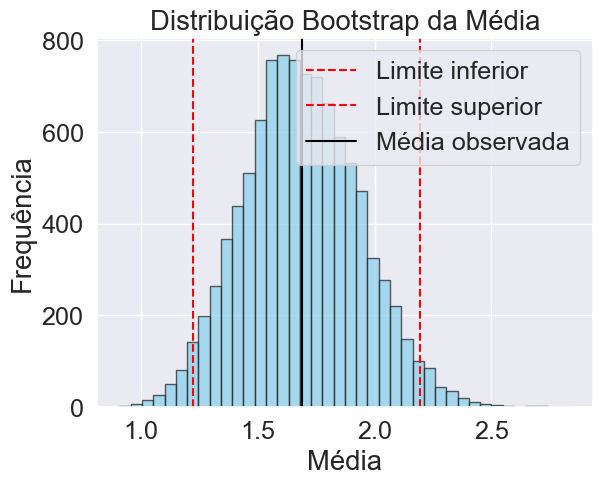

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Dados simulados
# ---------------------------
np.random.seed(42)
sample = np.random.exponential(scale=2.0, size=50)  # Distribuição assimétrica

# Estatística observada
mean_obs = np.mean(sample)
print(f"Média observada: {mean_obs:.3f}")

# ---------------------------
# 2. Bootstrapping
# ---------------------------
B = 10000  # número de reamostragens
boot_means = []

for _ in range(B):
    resample = np.random.choice(sample, size=len(sample), replace=True)
    boot_mean = np.mean(resample)
    boot_means.append(boot_mean)

boot_means = np.array(boot_means)

# ---------------------------
# 3. Intervalo de confiança (percentil)
# ---------------------------
lower = np.percentile(boot_means, 2.5)
upper = np.percentile(boot_means, 97.5)
print(f"IC 95% (percentil): [{lower:.3f}, {upper:.3f}]")

# ---------------------------
# 4. Visualização
# ---------------------------
plt.hist(boot_means, bins=40, color='skyblue', edgecolor='k', alpha=0.7)
plt.axvline(lower, color='red', linestyle='--', label='Limite inferior')
plt.axvline(upper, color='red', linestyle='--', label='Limite superior')
plt.axvline(mean_obs, color='black', linestyle='-', label='Média observada')
plt.title('Distribuição Bootstrap da Média')
plt.xlabel('Média')
plt.ylabel('Frequência')
plt.legend()
plt.show()

#### **O que o gráfico mostra**

* A **distribuição bootstrap da média**;
* A **média observada** nos dados originais (linha preta);
* Os **limites inferior e superior** do intervalo de confiança de 95% (linhas vermelhas tracejadas).

---

#### **Interpretação**

> Podemos dizer, com **95% de confiança**, que a média populacional está entre os valores do intervalo estimado, **sem precisar assumir que os dados seguem uma distribuição normal**.

### Exemplo 2

Neste exempplo do uso da técnica boostrapping para construir intervalos de confiança, vamos inicialmente usar uma simulação.

Original Mean: 170.04
Bootstrap 95% Confidence Interval: (167.92, 172.10)


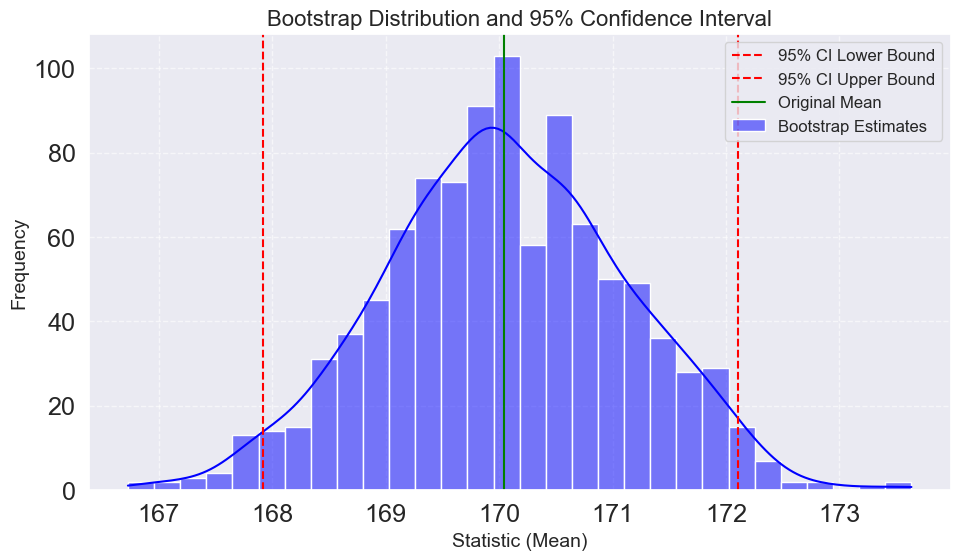

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some sample data (e.g., heights of people in cm)
data = np.random.normal(loc=170, scale=10, size=100)  # Mean=170, SD=10, N=100

# Bootstrap function
def bootstrap(data, num_resamples=1000, statistic=np.mean, ci=95):
    """
    Apply the bootstrap method to estimate a confidence interval for a statistic.

    Parameters:
        data (array-like): The data to resample.
        num_resamples (int): Number of bootstrap resamples.
        statistic (function): The statistic to compute (e.g., np.mean).
        ci (float): Confidence level (e.g., 95 for a 95% confidence interval).

    Returns:
        tuple: (bootstrap estimates, lower bound, upper bound)
    """
    bootstrap_estimates = []

    # Perform bootstrap resampling
    for _ in range(num_resamples):
        resample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_estimates.append(statistic(resample))

    # Compute confidence interval bounds
    lower_bound = np.percentile(bootstrap_estimates, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrap_estimates, 100 - (100 - ci) / 2)

    return bootstrap_estimates, lower_bound, upper_bound

# Apply the bootstrap method
num_resamples = 1000
ci = 95
bootstrap_estimates, lower_bound, upper_bound = bootstrap(data, num_resamples, ci=ci)

# Print the results
print(f"Original Mean: {np.mean(data):.2f}")
print(f"Bootstrap {ci}% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

# Visualize the bootstrap distribution
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_estimates, kde=True, color="blue", bins=30, label="Bootstrap Estimates")
plt.axvline(lower_bound, color="red", linestyle="--", label=f"{ci}% CI Lower Bound")
plt.axvline(upper_bound, color="red", linestyle="--", label=f"{ci}% CI Upper Bound")
plt.axvline(np.mean(data), color="green", linestyle="-", label="Original Mean")
plt.title(f"Bootstrap Distribution and {ci}% Confidence Interval", fontsize=16)
plt.xlabel("Statistic (Mean)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Save and show the plot
plt.savefig("bootstrap_confidence_interval.png", dpi=300)
plt.show()

### Exemplo 3

Para exemplificar o uso da técnica boostrapping, vamos usar nesse exemplo o conjunto de dados Boston, descrito [aqui](http://lib.stat.cmu.edu/datasets/boston). Em particular, vamos considerar o atributo denominada `dis` desse conjunto de dados. No contexto desse atributo, considere a seguinte tarefa:

> Construir um intervalo de confiança no nível de 95% para a mediana populacional do atributo `dis`.

**IMPORTANTE**: Repare que esse problema não pode ser resolvido com os procedimentos para construção de intervalos de confiança que estudamos anteriormente no curso, posto que eles podem ser usados para produzir intervalos apenas para a média ou para proporção populacionais.

Vamos inicialmente fazer a carga do conjunto de dados.

In [34]:
import pandas as pd

df = pd.read_csv('../data/Boston.csv')

Podemos consultar as dimensões desse conjunto de dados:

In [35]:
df.shape

(506, 15)

Podemos também ter acesso a um resumo estatísticos dos atributos componentes:

In [36]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Para fins de comparação posterior, vamos computar a mediana do atributo `dis`:

In [37]:
df.dis.median()

3.2074499999999997

Se queremos usar a técnica boostrapping para construir um intervalo de confiança para a mediana do atributo `dis`, devemos de início gerar as reamostras. Em seguida, usando essas reamostras, devemos gerar uma aproximação da distribuição amostral da mediana.

Veja o bloco de código a seguir. Esse bloco gera $10000$ reamostras usando o procedimento de amostragem com reposição. Para cada uma dessas reamostras, a estatística de interesse (i.e., a mediana) é computada. Finalmente, usamos a biblioteca seaborn para visualizar a aproximação da distribuição amostral.

In [38]:
#pip install seaborn

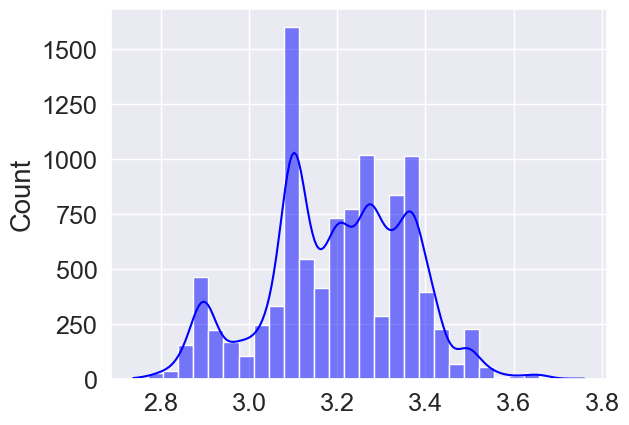

In [39]:
%matplotlib inline
import seaborn as sns
import numpy as np

original_sample = df.dis

# list comprehension
bootstrap_dist = [np.median(np.random.choice(
    original_sample, len(df.dis), replace=True)) for _ in range(10000)]

sns.histplot(bootstrap_dist, kde=True, color="blue", bins=30, label="Bootstrap Estimates")

# Save the plot to a file
#plt.savefig('pointplot_image.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

Repare que o código acima usa a função [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) para produzir a amostras com reposição. Um exemplo simples dessa função é apresentado no bloco de código a seguir:

In [40]:
import numpy as np
reamostra = np.random.choice([4, 5, 4, 7, 2], 5, replace=True)
print(reamostra)

[5 4 4 7 2]


In [41]:
np.median(reamostra)

4.0

O gráfico acima apresenta a aproximação produzida para a distribuição amostral da mediana.

Para fins de comparação posterior, podemos de início gerar uma estimativa pontual da mediana. Isso é feito no bloco de código a seguir.

In [42]:
import statistics as stats
stats.median(bootstrap_dist)

3.2074499999999997

Para computar o intervalo de confiança no nível de 95% para a mediana, usamos a aproximação para a distribuição amostral previamente computada. A partir dela, computamos os [percentis](http://www.indeed.com/career-advice/career-development/how-to-calculate-percentile) 2,5% e 97,5%. Esses percentis são os extremos do intervalo de confiança desejado.

In [43]:
linf = np.percentile(bootstrap_dist, 2.5)
lsup = np.percentile(bootstrap_dist, 97.5)
print("IC95 = (%.2f, %.2f)" % (linf, lsup))

IC95 = (2.88, 3.50)


Se o nível de confiança fosse 99% em vez de 95%:

In [44]:
linf = np.percentile(bootstrap_dist, 0.05)
lsup = np.percentile(bootstrap_dist, 99.95)
print("IC99 = (%.2f, %.2f)" % (linf, lsup))

IC99 = (2.78, 3.67)


Podemos também produzir uma estimativa do *erro padrão* (*standard error*) da mediana. Primeiramente, lembre-se de que o erro padrão de uma estatística é o desvio padrão de sua distribuição amostral. Sendo assim, para computar o erro padrão de mediana, basta computar o desvio padrão dos valores computados nas diversas reamostras. Veja o bloco de código a seguir.

In [45]:
se_mediana = np.std(bootstrap_dist)
print("Erro padrão da mediana: %.2f" % se_mediana)

Erro padrão da mediana: 0.16


A biblioteca [seaborn](https://seaborn.pydata.org) fornece em sua API a função `sns.algorithms.bootstrap`, que possibilita a construção de intervalos de confiança de forma mais direta do que o demonstrado acima, conforme exemplificado na célula de código abaixo. Repare que, não por acaso, os extremos do intervalo de confiança computados com essa função são bastante similares aos computados anteriormente.

In [46]:
bootstrap_dist = sns.algorithms.bootstrap(original_sample,
                                          n_boot = 10000,
                                          func = np.median)

linf = np.percentile(bootstrap_dist, 2.5)
lsup = np.percentile(bootstrap_dist, 97.5)
print("IC95 = (%.2f, %.2f)" % (linf, lsup))

IC95 = (2.87, 3.50)


Também usando a biblioteca seaborn, é possível obter uma perspectiva gráfica do intervalo de confiança produzido.

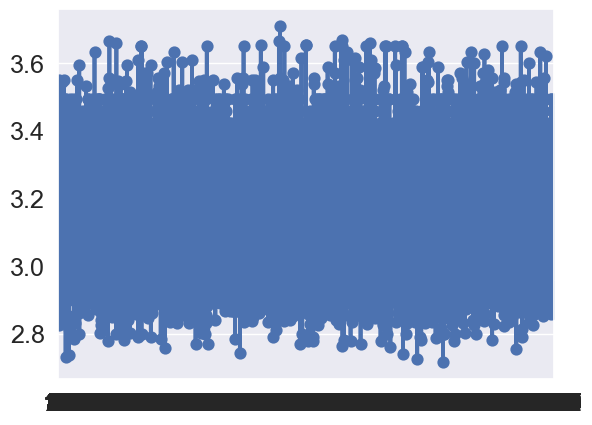

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pointplot(bootstrap_dist, errorbar=('ci', 95))

# Save the plot to a file
plt.savefig('pointplot_image.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

Ainda outra forma de computar intervalos de confiança por meio de Bootstrapping é usar a função `stats.bootstrap` da biblioteca [scipy](https://scipy.org), conforme o exemplo abaixo.

In [48]:
from scipy.stats import bootstrap
data = (original_sample,)  # samples must be in a sequence
res = bootstrap(data, np.median, confidence_level=0.95)
print(res.confidence_interval)

ConfidenceInterval(low=2.8893, high=3.4952)


## Realização de testes de hipóteses

Para aplicar o **bootstrapping clássico** em um **teste de hipóteses**, o procedimento geral envolve **simular a distribuição da estatística de interesse sob a hipótese nula**, usando reamostragem com reposição. Abaixo estão os passos detalhados:

---

### **Passos para um teste de hipóteses com bootstrapping clássico**

#### **1. Defina a estatística de interesse**

Escolha uma estatística $T$ que será usada para testar a hipótese — por exemplo, média, mediana, diferença de médias, coeficiente de regressão etc.

#### **2. Estabeleça a hipótese nula $H_0$**

Exemplo: $H_0: \mu_A = \mu_B$, ou seja, não há diferença entre as médias dos grupos A e B.

#### **3. Calcule a estatística observada**

Calcule $T_{\text{obs}}$, a estatística de interesse com os dados originais.

#### **4. Simule a distribuição nula via reamostragem**

* Combine os grupos se necessário (para simular que vêm da mesma distribuição, sob $H_0$).
* Faça várias reamostragens **com reposição** dos dados (tipicamente 1.000 a 10.000 vezes).
* Para cada reamostra, calcule a estatística $T^*$ correspondente.
* Isso gera uma **distribuição empírica sob $H_0$**.

#### **5. Calcule o valor-p**

Compare $T_{\text{obs}}$ com a distribuição de $T^*$. O valor-p depende do tipo de teste:

* **Bilateral**:

  $$
  \text{valor-}p = \frac{\#(|T^*| \geq |T_{\text{obs}}|)}{B}
  $$
* **Unilateral** (por exemplo, $T_{\text{obs}} > 0$):

  $$
  \text{valor-}p = \frac{\#(T^* \geq T_{\text{obs}})}{B}
  $$

Onde $B$ é o número de reamostragens.

#### **6. Tome a decisão**

Compare o valor-p com o nível de significância $\alpha$ (geralmente 0,05). Se $p \leq \alpha$, **rejeite $H_0$**.

---

### **Exemplo 1: diferença de médias entre dois grupos**

1. Combine os dados dos grupos A e B (como se fossem da mesma população).
2. Reamostre dois grupos com o mesmo tamanho dos originais.
3. Calcule a diferença de médias entre os dois grupos reamostrados.
4. Repita os passos 2–3 várias vezes para construir a distribuição nula.
5. Compare a diferença de médias real com a distribuição obtida.

Abaixo está um **exemplo em Python** de como aplicar o **bootstrapping clássico** para realizar um **teste de hipótese sobre a diferença de médias entre dois grupos**, sem assumir normalidade.

> **Problema**: Teste se há diferença significativa entre as médias dos grupos `A` e `B`.



Diferença observada: 0.567
Valor-p (teste bilateral): 0.0191


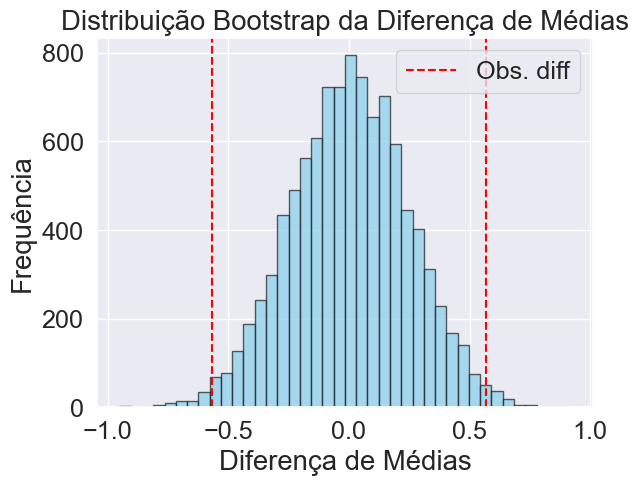

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Dados simulados
np.random.seed(42)
group_A = np.random.normal(loc=5, scale=1, size=30)
group_B = np.random.normal(loc=5.5, scale=1, size=30)

# Estatística observada: diferença de médias
obs_diff = np.mean(group_B) - np.mean(group_A)
print(f"Diferença observada: {obs_diff:.3f}")

# Combine os grupos (hipótese nula: mesmas distribuições)
combined = np.concatenate([group_A, group_B])
n_A, n_B = len(group_A), len(group_B)

# Reamostragem bootstrap sob H0
n_boot = 10000
boot_diffs = []

for _ in range(n_boot):
    resample = np.random.choice(combined, size=n_A + n_B, replace=True)
    resample_A = resample[:n_A]
    resample_B = resample[n_A:]
    diff = np.mean(resample_B) - np.mean(resample_A)
    boot_diffs.append(diff)

# Cálculo do valor-p (teste bilateral)
boot_diffs = np.array(boot_diffs)
p_value = np.mean(np.abs(boot_diffs) >= np.abs(obs_diff))
print(f"Valor-p (teste bilateral): {p_value:.4f}")

# Plot da distribuição bootstrap
plt.hist(boot_diffs, bins=40, alpha=0.7, color='skyblue', edgecolor='k')
plt.axvline(obs_diff, color='red', linestyle='--', label='Obs. diff')
plt.axvline(-obs_diff, color='red', linestyle='--')
plt.title('Distribuição Bootstrap da Diferença de Médias')
plt.xlabel('Diferença de Médias')
plt.ylabel('Frequência')
plt.legend()
plt.show()


**Interpretação**

* O **valor-p** indica a **proporção de reamostragens em que a diferença foi tão ou mais extrema** que a observada.
* Se $p < 0{,}05$, você **rejeita a hipótese nula** de que os grupos têm médias iguais.

### Exemplo 2

Crétidos: este estudo de caso é uma adaptação do encontrado [aqui](https://codingdisciple.com/bootstrap-hypothesis-testing.html).

Também podemos usar bootstrapping para testes de hipóteses. Para isso, vamos usar o conjunto de dados de métricas do Facebook. [Aqui](https://archive.ics.uci.edu/ml/datasets/Facebook+metrics) você encontra a documentação desse conjunto de dados.

> The data is related to posts' published during the year of 2014 on the Facebook's page of a renowned cosmetics brand.
This dataset contains 500 of the 790 rows and part of the features analyzed by Moro et al. (2016). The remaining were omitted due to confidentiality issues.


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('../data/dataset_Facebook.csv', delimiter=';')
data.shape

(500, 19)

Primeiro, vamos explorar o conjunto de dados.

Dois atributos desse conjunto de dados são `likes` e `Paid`. 
- O primeiro indica a quantidade de curtidas que a a publicação (*post*) recebeu. 
- O segundo indica se o posto foi pago ou não.

No bloco de código abaixo, as séries `paid_likes` e `unpaid_likes` armazenam as quantidades de curtidas das publicações pagas e das não pagas, respectivamente. Esse bloco de código apresenta as distribuições dessas duas coleções como histogramas.

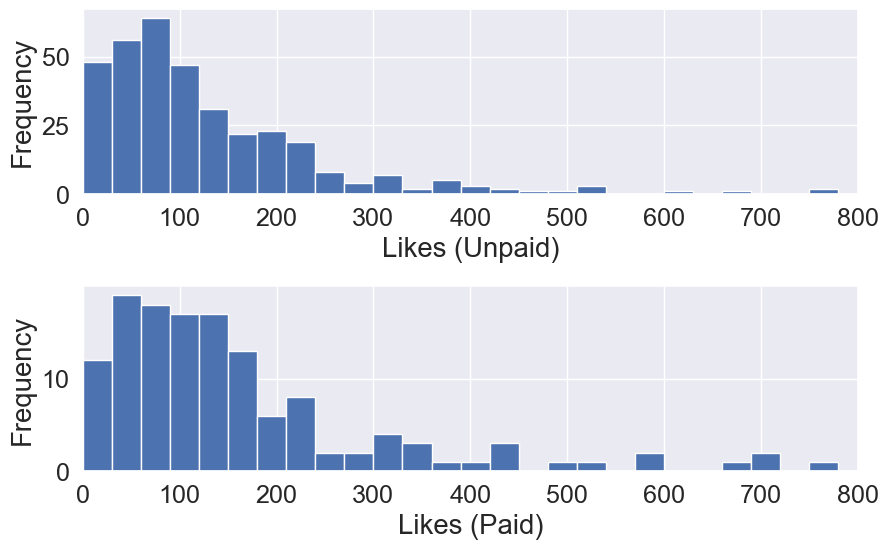

unpaid_mean: 155.84679665738162
paid_mean: 235.6474820143885


In [51]:
# Boolean filtering/remove missing values
unpaid_likes = data[data['Paid']==0]['like']
paid_likes = data[data['Paid']==1]['like']
paid_likes = paid_likes.dropna()
unpaid_likes = unpaid_likes.dropna()

# Figure settings
sns.set(font_scale=1.65)
fig = plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=.5)

# Plot top histogram
ax = fig.add_subplot(2, 1, 1)
ax = unpaid_likes.hist(range=(0, 1500),bins=50)
ax.set_xlim(0,800)
plt.xlabel('Likes (Unpaid)')
plt.ylabel('Frequency')

#Plot bottom histogram
ax2 = fig.add_subplot(2, 1, 2)
ax2 = paid_likes.hist(range=(0, 1500),bins=50)
ax2.set_xlim(0,800)

plt.xlabel('Likes (Paid)')
plt.ylabel('Frequency')

plt.show()
print('unpaid_mean: {}'.format(unpaid_likes.mean()))
print('paid_mean: {}'.format(paid_likes.mean()))

No resultado do bloco de código abaixo, podemos ver que as quantidades de publicações curtidas pagas e não-pagas são 139 e 359, respectivamente.

In [52]:
print('paid_size: {}'.format(len(paid_likes)))
print('unpaid_size: {}'.format(len(unpaid_likes)))

paid_size: 139
unpaid_size: 359


Agora, voltemos ao problema de realizar o teste de hipóteses. Queremos saber se anúncios (publicações) pagos estão associados no Facebook a uma quantidade maior de curtidas.

Nossa hipótese nula declara que pagar por anúncios não afeta a quantidade de curtidas.

$$
H_0:\mu_1−\mu_0=0
$$

Já a hipótese alternativa sugere que pagar por anúncios aumenta a quantidade de curtidas.

$$
H_a:\mu_1−\mu_0>0
$$

Quando se trata de testes de hipóteses, sempre começamos presumindo que a hipótese nula é verdadeira. Para realizar esse teste usando a técnica Bootstrapping, a ideia é simular uma grande população de dados bootstrap e, em seguida, extrair as amostras dessa população bootstrap. Em seguida, verificaremos a probabilidade de obter diferenças observadas nas médias. Se a probabilidade for menor do que $0.05$ (valor do nível de significância escolhido), rejeitaremos a hipótese nula.

O código abaixo gera $10.000$ amostras de comprimento $139$ e $10.000$ amostras de comprimento $359$ a partir dos dados combinados e, em seguida, calcula a diferença nas médias das amostras.

In [53]:
#pip install scikit-learn

In [54]:
from sklearn.utils import resample

combined = np.concatenate((paid_likes, unpaid_likes), axis=0)

perms_paid = []
perms_unpaid = []

for i in range(10000):
    np.random.seed(i)
    perms_paid.append(resample(combined, n_samples = len(paid_likes)))
    perms_unpaid.append(resample(combined, n_samples = len(unpaid_likes)))

mu1 = np.mean(perms_paid, axis=1)
mu0 = np.mean(perms_unpaid, axis=1)
dif_bootstrap_means = (mu1-mu0)
dif_bootstrap_means

array([-17.03639206,  -2.20771127,  -1.03336606, ...,  27.32095549,
        24.98577183,  18.7842929 ])

O histograma abaixo é a distribuição da estatística (diferenças nas médias amostrais), também conhecida como *distribuição bootstrap*.

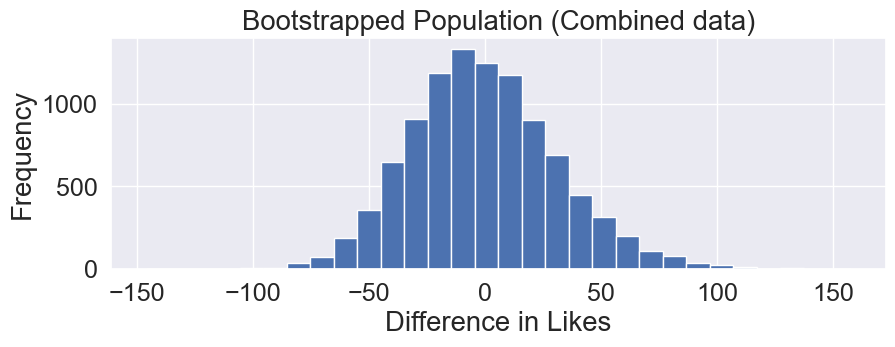

In [55]:
fig = plt.figure(figsize=(10,3))
ax = plt.hist(dif_bootstrap_means, bins=30)

plt.xlabel('Difference in Likes')
plt.ylabel('Frequency')
plt.title('Bootstrapped Population (Combined data)')
plt.show()

Em seguida, vamos calcular a diferença observada nas médias das amostras originais.

In [56]:
obs_difs = (np.mean(paid_likes) - np.mean(unpaid_likes))
print('observed difference in means: {}'.format(obs_difs))

observed difference in means: 79.80068535700687


Usando nossa distribuição bootstrap e a diferença observada nas amostras originais, podemos determinar a probabilidade de obter uma diferença nas médias de $79.80$.

In [57]:
p_value = dif_bootstrap_means[dif_bootstrap_means >= obs_difs].shape[0]/10000
print('p-value: {}'.format(p_value))

p-value: 0.0137


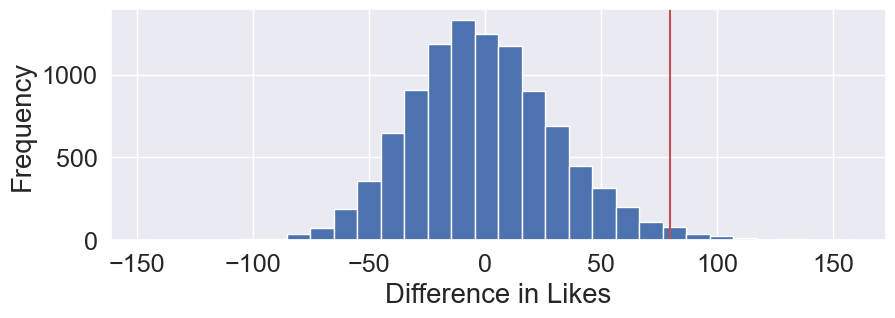

In [58]:
fig = plt.figure(figsize=(10,3))
ax = plt.hist(dif_bootstrap_means, bins=30)

plt.xlabel('Difference in Likes')
plt.ylabel('Frequency')
plt.axvline(obs_difs, color='r')
plt.show()

Das 10.000 amostras de bootstrap, apenas 137 dessas amostras tiveram uma diferença nas médias de 79,8 ou superior mostrada pela linha vermelha acima. Resultando em um valor $p = 0.0137$. Esta não é uma ocorrência muito provável. Em particular, $p < \alpha$. Como resultado, rejeitamos a hipótese nula.